##Airbnb dataset analysis

The given questions:
1. In the data, there are two values of host_identity_verified. Which value is larger?
2. What are the top 2 neighbourhood_group?
3. How many room types are in the data and what are their proportions?


In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Checking the dataset


In [2]:
# importing the data and take a look
df = pd.read_csv('Data.csv')

df.head()

<ipython-input-2-ebff2680754b>:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
print(df.shape)
df.info()

(102599, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  can

# Q1

In [4]:
# Checking if there are any duplicates
df.duplicated().value_counts()

False    102058
True        541
dtype: int64

In [5]:
# Before cleaning, lets make a copy of the dataframe.
df_clean = df.copy()

In [6]:
# Drop the duplicate rows
df_clean = df_clean.drop_duplicates()
df_clean.duplicated().value_counts()

False    102058
dtype: int64

Without duplicate, we can answer the first question.

In [7]:
# q1 In the data, there are two values of host_identity_verified. Which value is larger?
# count id because it is unique
df_q1 = df_clean.groupby('host_identity_verified').count()['id']
df_q1

host_identity_verified
unconfirmed    50944
verified       50825
Name: id, dtype: int64

As the result, the number of unconfirmed is beigger than verified.

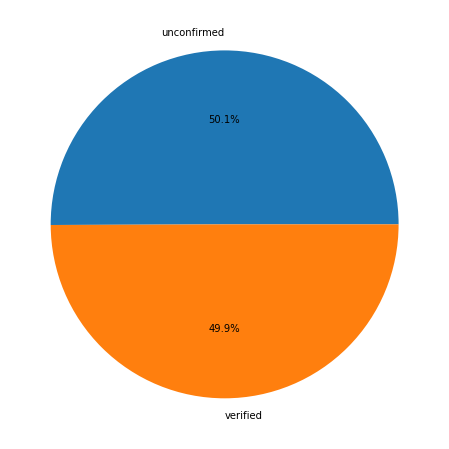

In [8]:
# visulize the result
x = ['unconfirmed','verified']
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df_q1, labels = x, autopct='%.1f%%')

plt.show()

## Q2
To find top two neighboorhood group, I should use the average review rate group by neighboorhood group. However, I should check if there are invald values in the column.

In [9]:
# check if there are NaNs
print(df_clean['review rate number'].isnull().sum())

319


In [10]:
# drop the rows which have NaNs
df_clean_q2 = df_clean.dropna(subset=['review rate number'])
print(df_clean_q2['review rate number'].isnull().sum())


0


In [11]:
# check if there values that are bigger than 5 or less than 1
df_clean_q2.groupby('review rate number').count()['id']

review rate number
1.0     9186
2.0    22972
3.0    23130
4.0    23200
5.0    23251
Name: id, dtype: int64

Ok, we can tell there is no error. Now we can do the analysis.

In [12]:
df_clean_q2.groupby('neighbourhood group').count()['id']

neighbourhood group
Bronx             2677
Brooklyn         41514
Manhattan        43417
Queens           13159
Staten Island      943
brookln              1
manhatan             1
Name: id, dtype: int64

Two rows have typing error at the neighborhood name. "brookln" and "manhatan". Yet, have very little influence on the result. I choose to drop them.

In [13]:
wrong_brooklyn_index = df_clean_q2.index[df_clean_q2['neighbourhood group'] == 'brookln'][0]
wrong_Manhattan_index = df_clean_q2.index[df_clean_q2['neighbourhood group'] == 'manhatan'][0]
df_q2_result = df_clean_q2.drop(index = [wrong_brooklyn_index, wrong_Manhattan_index])

In [14]:
df_q2_result = df_q2_result.groupby('neighbourhood group').mean()['review rate number']

In [15]:
df_q2_result.sort_values(ascending = False)

neighbourhood group
Staten Island    3.404030
Bronx            3.331341
Queens           3.330420
Manhattan        3.276528
Brooklyn         3.258443
Name: review rate number, dtype: float64

As the result, the top two neighborhood group are Staten Island and Bronx.

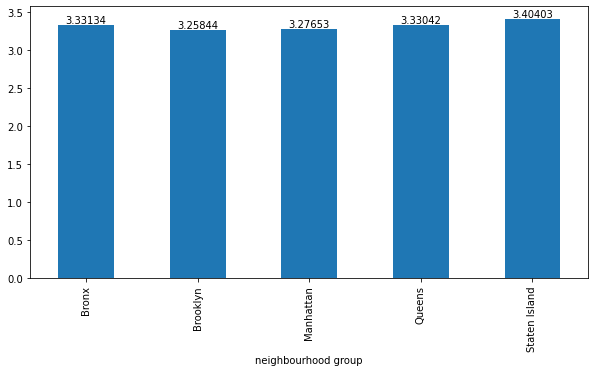

In [16]:
# visualize the result
ax_q2 = df_q2_result.plot.bar(figsize=(10, 5))
for i in ax_q2.containers:
    ax_q2.bar_label(i, label_type='edge', fontsize=10)
plt.show()

##Q3
To check how many room types and their proportion, I need to count the number of id group by room types.

In [17]:
# drop the rows with null room type value
print(df_clean['room type'].isnull().sum())

0


There is no null, so we can check how many room types and visualize the proportion

In [18]:
num_room_types = df['room type'].nunique()
print('there are %d room types' % num_room_types)

there are 4 room types


In [19]:
df_q3 = df_clean.groupby('room type').count()['id']
df_q3

room type
Entire home/apt    53429
Hotel room           115
Private room       46306
Shared room         2208
Name: id, dtype: int64

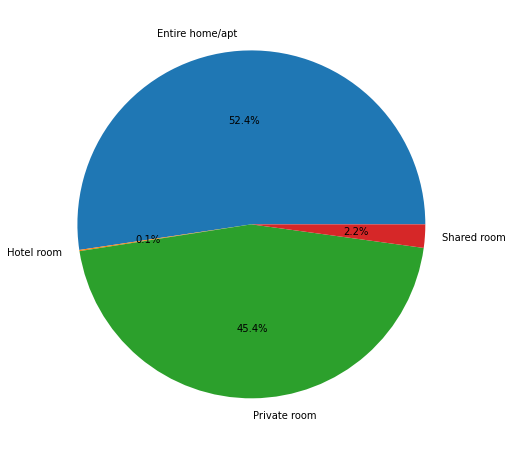

In [20]:
# visualize the result
plt.figure(figsize=(8, 8))
plt.pie(df_q3, labels=df_q3.index.map(str), autopct='%1.1f%%')
plt.show()

##Additional questions

###Does choosing a verified host impact my experience? What features make a host more likely to receive high ratings?

In [21]:
# drop the rows where the host_identity_verified is null
df_verified = df_clean.dropna(subset=['host_identity_verified'])
print(df_verified['host_identity_verified'].isnull().sum())

0


In [22]:
# average rating for listings hosted by verified hosts and non-verified hosts
verified_hosts_avg_rating = df_verified.groupby('host_identity_verified')['review rate number'].mean()
verified_hosts_avg_rating

host_identity_verified
unconfirmed    3.272033
verified       3.285675
Name: review rate number, dtype: float64

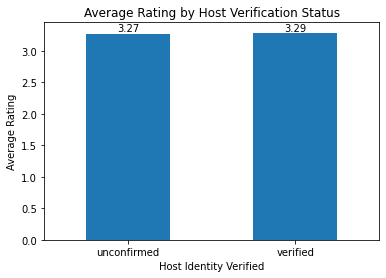

In [23]:
# visualization
ax = verified_hosts_avg_rating.plot(kind='bar', rot=0) 
for i, v in enumerate(verified_hosts_avg_rating):
    ax.annotate(f"{v:.2f}", xy=(i, v), ha='center', va='bottom')

plt.title('Average Rating by Host Verification Status')
plt.xlabel('Host Identity Verified')
plt.ylabel('Average Rating')
plt.show()

There is not much information from the result because the difference is only 0.02. Thus, I choose to calculate the correlation between rate and interesting features that are linear to see the relationship then deal with the others

In [24]:
# calculate the correlation (linear features)
# first, drop the null
df_clean_corr = df_clean.dropna(subset=['review rate number', 'price', 'service fee', 'minimum nights', 'Construction year', 'calculated host listings count', 'number of reviews'])

In [25]:
# turn price and fee into float type
# Remove the '$' sign
df_clean_corr['price'] = df_clean_corr['price'].str.replace('$', '')

# Remove commas and characters
df_clean_corr['price'] = df_clean_corr['price'].str.replace(',', '').astype(float)

# Convert the resulting strings to floats
df_clean_corr['price'] = df_clean_corr['price'].astype(float)

<ipython-input-25-6da728347f18>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean_corr['price'] = df_clean_corr['price'].str.replace('$', '')
<ipython-input-25-6da728347f18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_corr['price'] = df_clean_corr['price'].str.replace('$', '')
<ipython-input-25-6da728347f18>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [26]:
df_clean_corr['service fee'] = df_clean_corr['service fee'].str.replace('$', '')
df_clean_corr['service fee'] = df_clean_corr['service fee'].str.replace(',', '').astype(float)
df_clean_corr['service fee'] = df_clean_corr['service fee'].astype(float)

<ipython-input-26-f43ba5acff40>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean_corr['service fee'] = df_clean_corr['service fee'].str.replace('$', '')
<ipython-input-26-f43ba5acff40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_corr['service fee'] = df_clean_corr['service fee'].str.replace('$', '')
<ipython-input-26-f43ba5acff40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [27]:
# normalize the columns
df_clean_corr_normalized = (df_clean_corr[['review rate number', 'price', 'service fee', 'minimum nights', 'Construction year', 'calculated host listings count', 'number of reviews']] - df_clean_corr[['review rate number', 'price', 'service fee', 'minimum nights', 'Construction year', 'calculated host listings count', 'number of reviews']].mean()) / df_clean_corr[['review rate number', 'price', 'service fee', 'minimum nights', 'Construction year', 'calculated host listings count', 'number of reviews']].std()

In [28]:
df_clean_corr_normalized

,review rate number,price,service fee,minimum nights,Construction year,calculated host listings count,number of reviews
0,0.560274,1.026765,1.023684,0.061326,1.303443,-0.060098,-0.372533
1,0.560274,-1.457783,-1.463753,0.712670,-0.952219,-0.183929,0.357421
2,1.338872,-0.016504,-0.016517,-0.166644,-1.299244,-0.214887,-0.555021
3,0.560274,-0.776342,-0.770286,0.712670,-1.299244,-0.214887,4.919631
4,-0.218324,-1.270839,-1.267773,0.061326,-0.605194,-0.214887,-0.372533
...,...,...,...,...,...,...,...
102040,-0.996922,1.075009,1.068910,-0.231778,1.650468,-0.183929,4.291060
102041,-1.775520,0.966461,0.963383,-0.231778,1.303443,-0.214887,0.985992
102042,0.560274,0.242806,0.239765,-0.231778,-0.084657,-0.214887,-0.473915
102043,0.560274,1.258938,1.264890,-0.199211,1.303443,-0.183929,-0.129215


In [29]:
# calaulate the corr
df_clean_corr_normalized = df_clean_corr[['review rate number', 'price', 'service fee', 'minimum nights', 'Construction year', 'calculated host listings count', 'number of reviews']].corr()
df_clean_corr_normalized[['review rate number']]

,review rate number
review rate number,1.000000
price,-0.005156
service fee,-0.005160
minimum nights,-0.002561
Construction year,0.005341
calculated host listings count,0.024288
number of reviews,-0.017587


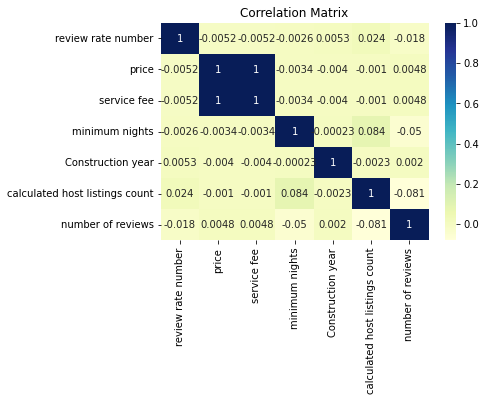

In [30]:
# visualize the result
sns.heatmap(df_clean_corr_normalized, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

###which room type is rated higher in the data

In [31]:
# drop the null
df_room_type_clean = df_clean.dropna(subset=['room type', 'review rate number'])

In [32]:
# first checking the amount of each type
temp = df_room_type_clean.groupby('room type')['id'].count()
temp

room type
Entire home/apt    53274
Hotel room           115
Private room       46149
Shared room         2201
Name: id, dtype: int64

In [33]:
# calculte the mean rate grouped by room type
df_room_type_clean = df_room_type_clean.groupby('room type').mean()

In [34]:
df_room_type_rate = df_room_type_clean[['review rate number']]
df_room_type_rate

,review rate number
room type,
Entire home/apt,3.274787
Hotel room,3.539130
Private room,3.281371
Shared room,3.305316


calculate the price of each room type

In [35]:
# price will be in the continued analysis
# turn price and fee into float type
# Remove the '$' sign
df_clean['price'] = df_clean['price'].str.replace('$', '')

# Remove commas
df_clean['price'] = df_clean['price'].str.replace(',', '').astype(float)

# Convert the resulting strings to floats
df_clean['price'] = df_clean['price'].astype(float)

<ipython-input-35-1631e1ad257c>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['price'] = df_clean['price'].str.replace('$', '')


In [36]:
df_room_type_price = df_clean.dropna(subset = ['price', 'room type'])

In [37]:
df_room_type_price = df_clean.groupby('room type').mean()
df_room_type_price[['price']]

,price
room type,
Entire home/apt,625.240056
Hotel room,666.391304
Private room,624.935628
Shared room,634.828182


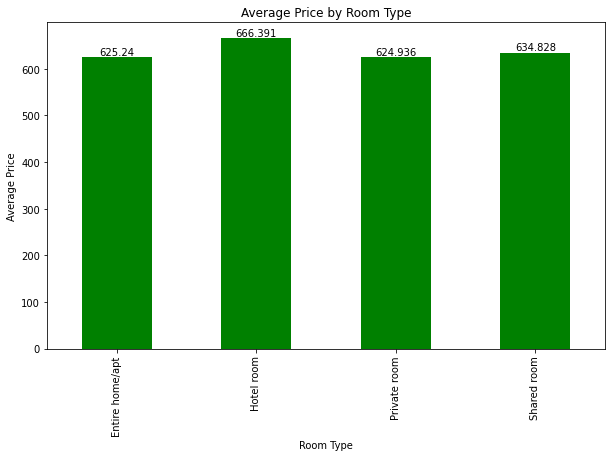

In [38]:
prices_room_type = df_room_type_price['price']

ax_prices_room_type = prices_room_type.plot.bar(figsize=(10, 6), color = 'green')
for i in ax_prices_room_type.containers:
    ax_prices_room_type.bar_label(i, label_type='edge', fontsize=10)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

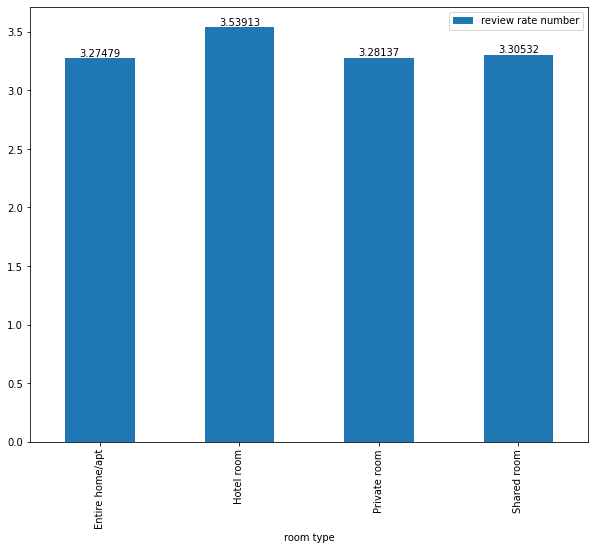

In [39]:
# visualization
ax_room_type_rate = df_room_type_rate.plot.bar(figsize=(10, 8))
for i in ax_room_type_rate.containers:
    ax_room_type_rate.bar_label(i, label_type='edge', fontsize=10)
plt.show()

###Because my budget is limited, I wonder which neighborhood group is rated highest, and also the price is lower than the limitation.

In [40]:
df_budget = df_clean.drop(index = [wrong_brooklyn_index, wrong_Manhattan_index])

In [41]:
# filter the data with budget
budget = 100
df_budget = df_clean[df_clean['price'] <= 100]

In [42]:
df_budget_neighborhood_rate = df_budget.groupby('neighbourhood group')['review rate number'].mean()
df_budget_neighborhood_rate

neighbourhood group
Bronx            3.372340
Brooklyn         3.183506
Manhattan        3.281218
Queens           3.261364
Staten Island    3.782609
Name: review rate number, dtype: float64

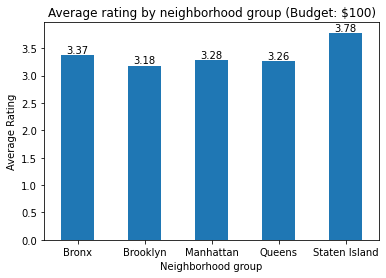

In [43]:
ax = df_budget_neighborhood_rate.plot(kind='bar', rot=0) 
for i, v in enumerate(df_budget_neighborhood_rate):
    ax.annotate(f"{v:.2f}", xy=(i, v), ha='center', va='bottom')

plt.title(f"Average rating by neighborhood group (Budget: ${budget})")
plt.xlabel("Neighborhood group")
plt.ylabel('Average Rating')
plt.show()

In [62]:
df_budget.groupby('neighbourhood group')['review rate number'].count()

neighbourhood group
Bronx              94
Brooklyn         1831
Manhattan        1938
Queens            528
Staten Island      46
Name: review rate number, dtype: int64

And then we check the review rate of each room type under the budget condition

In [51]:
# average rate of each room type
df_budget_room_type_rate = df_budget.groupby('room type').mean()
df_budget_room_type_rate[['review rate number']]

,review rate number
room type,
Entire home/apt,3.247923
Hotel room,3.000000
Private room,3.242007
Shared room,3.260870


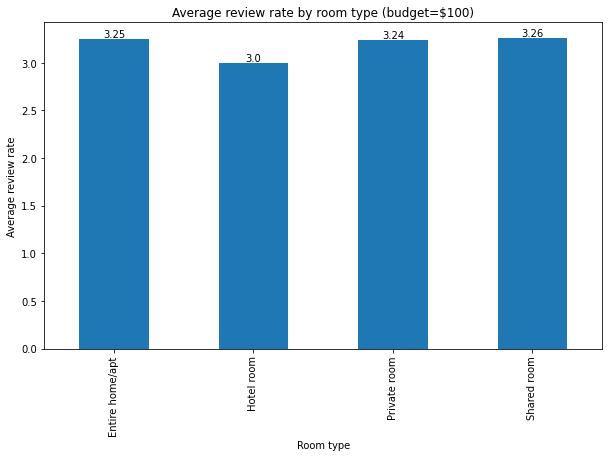

In [61]:
# visualize
ax = df_budget_room_type_rate[['review rate number']].plot(kind='bar', figsize = (10, 6), legend = False)
plt.title("Average review rate by room type (budget=$100)")
plt.xlabel("Room type")
plt.ylabel("Average review rate")

# Add annotations
for i, v in enumerate(df_budget_room_type_rate['review rate number']):
    ax.text(i, v+0.02, str(round(v,2)), ha='center')
    
plt.show()

##Conclusions
Please check in the report file
